#### Name : Janhavi Katre 
#### Roll No : 05

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_2 (Dense)             (None, 32)                25120     
                                                                 
 dense_3 (Dense)             (None, 784)               25872     
                                                                 
Total params: 50992 (199.19 KB)
Trainable params: 50992 (199.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
235/235 [==============================] - 3s 6ms/step - loss: 0.2735 - val_loss: 0.1888
Epoch 2/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1711 - val_loss: 0.1544
Epoch 3/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1445 - va

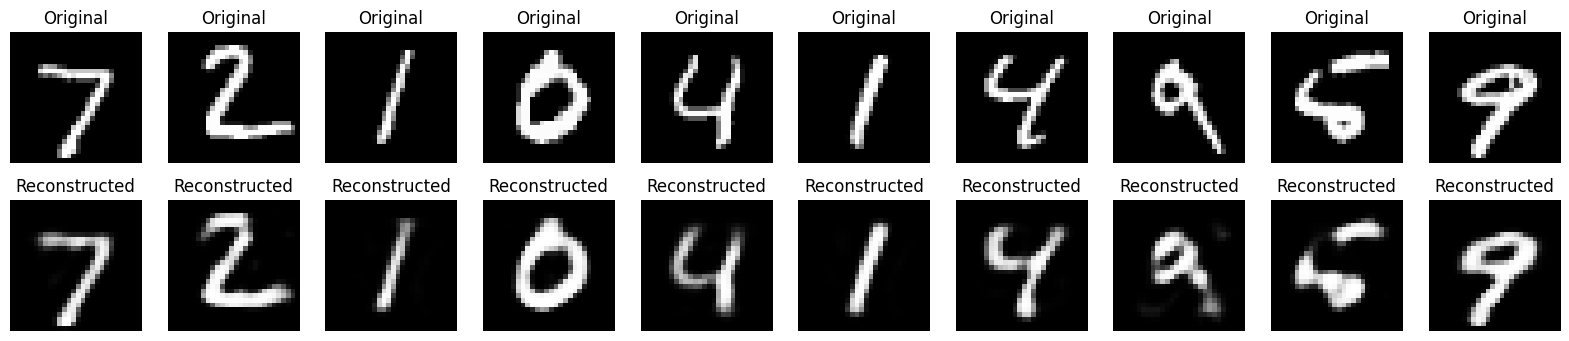

In [2]:
#!/usr/bin/env python
# coding: utf-8

# In[32]:


import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist


# In[41]:


# Load the MNIST dataset
(train_images, _), (test_images, _) = mnist.load_data()

# Normalize pixel values to range [0, 1]
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# Flatten the images from (28, 28) to (784,)
train_images = train_images.reshape((len(train_images), np.prod(train_images.shape[1:])))
test_images = test_images.reshape((len(test_images), np.prod(test_images.shape[1:])))


# In[34]:


# Define the input layer
input_img = Input(shape=(784,))

# Define the encoder layer with a ReLU activation function
encoded = Dense(32, activation='relu')(input_img)

# Define the decoder layer with a sigmoid activation function
decoded = Dense(784, activation='sigmoid')(encoded)

# Create the autoencoder model
autoencoder = Model(input_img, decoded)


# In[35]:


autoencoder.compile(optimizer='adam', loss='binary_crossentropy')


# In[36]:


autoencoder.summary()


# In[38]:


autoencoder.fit(train_images, train_images, epochs=50, batch_size=256, shuffle=True, validation_data=(test_images, test_images))


# In[40]:



decoded_imgs = autoencoder.predict(test_images)


# In[46]:


decoded_test_images = np.clip(decoded_imgs * 255, 0, 255).astype('uint8')


# In[47]:


n = 10  # Number of images to display
plt.figure(figsize=(20, 4))

for i in range(n):
    # Display original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    plt.title('Original')
    plt.axis('off')

    # Display reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_test_images[i].reshape(28, 28), cmap='gray')
    plt.title('Reconstructed')
    plt.axis('off')

plt.show()


# In[ ]:




